# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[71, 62, 64, ..., 93, 92, 69],
       [ 7, 33, 61, ...,  1, 51, 89],
       [81, 18, 25, ..., 58, 93, 84],
       ...,
       [ 6, 12, 43, ..., 75, 32, 13],
       [ 0, 19, 93, ..., 22, 73, 55],
       [74, 98, 66, ..., 90, 30, 19]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
rng = np.random.default_rng()

rng.shuffle(A, axis=1)
A

array([[38,  1, 50, ..., 93, 94, 20],
       [42, 98, 11, ...,  1, 99, 41],
       [79, 66, 56, ..., 58, 33, 69],
       ...,
       [91, 32,  8, ..., 75, 15, 33],
       [58, 69, 34, ..., 22, 85, 51],
       [38, 52, 24, ..., 90, 48, 45]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
A[A[:, ::2].sum(axis=1) > A[:, 1::2].sum(axis=1).mean()]

array([[38,  1, 50, ..., 93, 94, 20],
       [42, 98, 11, ...,  1, 99, 41],
       [79, 66, 56, ..., 58, 33, 69],
       ...,
       [52, 74, 68, ..., 99, 36, 25],
       [98,  5, 67, ..., 11, 75,  9],
       [37, 70, 91, ..., 17, 68, 93]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
np.argmax(A.max(axis=1) - A.min(axis=1))

4

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
A.argsort(axis=None).argsort().reshape(A.shape) + 1

array([[3822,  188, 4972, ..., 9326, 9430, 2106],
       [4178, 9910, 1095, ...,  179, 9992, 4049],
       [7887, 6639, 5539, ..., 5784, 3253, 6830],
       ...,
       [9156, 3165,  822, ..., 7448, 1593, 3243],
       [5824, 6841, 3360, ..., 2269, 8498, 5117],
       [3787, 5153, 2449, ..., 9084, 4718, 4487]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
(A - np.vstack(A.min(axis=1))) / np.vstack(A.max(axis=1) - A.min(axis=1))

array([[0.37755102, 0.        , 0.5       , ..., 0.93877551, 0.94897959,
        0.19387755],
       [0.41836735, 0.98979592, 0.10204082, ..., 0.        , 1.        ,
        0.40816327],
       [0.78947368, 0.65263158, 0.54736842, ..., 0.56842105, 0.30526316,
        0.68421053],
       ...,
       [0.92783505, 0.31958763, 0.07216495, ..., 0.7628866 , 0.1443299 ,
        0.32989691],
       [0.59183673, 0.70408163, 0.34693878, ..., 0.2244898 , 0.86734694,
        0.52040816],
       [0.3814433 , 0.5257732 , 0.2371134 , ..., 0.91752577, 0.48453608,
        0.45360825]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
A * np.arange(1, 11).reshape(10, 1, 1)

array([[[ 38,   1,  50, ...,  93,  94,  20],
        [ 42,  98,  11, ...,   1,  99,  41],
        [ 79,  66,  56, ...,  58,  33,  69],
        ...,
        [ 91,  32,   8, ...,  75,  15,  33],
        [ 58,  69,  34, ...,  22,  85,  51],
        [ 38,  52,  24, ...,  90,  48,  45]],

       [[ 76,   2, 100, ..., 186, 188,  40],
        [ 84, 196,  22, ...,   2, 198,  82],
        [158, 132, 112, ..., 116,  66, 138],
        ...,
        [182,  64,  16, ..., 150,  30,  66],
        [116, 138,  68, ...,  44, 170, 102],
        [ 76, 104,  48, ..., 180,  96,  90]],

       [[114,   3, 150, ..., 279, 282,  60],
        [126, 294,  33, ...,   3, 297, 123],
        [237, 198, 168, ..., 174,  99, 207],
        ...,
        [273,  96,  24, ..., 225,  45,  99],
        [174, 207, 102, ...,  66, 255, 153],
        [114, 156,  72, ..., 270, 144, 135]],

       ...,

       [[304,   8, 400, ..., 744, 752, 160],
        [336, 784,  88, ...,   8, 792, 328],
        [632, 528, 448, ..., 464, 264, 552

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

array([[38, 50, 65, ..., 62, 93, 20],
       [42, 11, 60, ..., 33,  1, 41],
       [79, 56, 91, ..., 18, 58, 69],
       ...,
       [91,  8, 84, ..., 12, 75, 33],
       [58, 34, 69, ..., 19, 22, 51],
       [38, 24,  5, ..., 98, 90, 45]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
np.count_nonzero(np.all(A > 5, axis=1))

5

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
np.array(np.split(A, 10)).mean(axis=0)

array([[34.9, 49.9, 47.5, 43.5, 43.5, 40.6, 66. , 53.4, 42.1, 60.7, 31.9,
        46.1, 38.9, 51.9, 41.9, 58.8, 49.9, 55.9, 46.6, 42.6, 46.5, 47.4,
        38.8, 42.7, 39.9, 45.1, 63.4, 48.6, 42.3, 52.6, 51.6, 48.3, 53.7,
        44.5, 30.4, 48.6, 69.5, 59.7, 53.8, 48.1, 44.5, 50.6, 51.9, 54.2,
        32.9, 51.5, 50.2, 62. , 80.8, 48.9],
       [48.2, 64. , 43.3, 33.3, 51.4, 32.6, 61.5, 65.1, 46.1, 51.3, 44. ,
        49. , 43.3, 49.9, 70.8, 47.8, 52.4, 38. , 66. , 57.3, 49. , 56.5,
        50.7, 47.1, 50.6, 43.5, 43.7, 53.5, 54.8, 28.5, 39.8, 46.2, 49.9,
        57.9, 43.3, 39.3, 52.1, 41.1, 53.7, 41.1, 46.3, 35.3, 70.7, 50.1,
        50.5, 56.7, 48.6, 33.8, 64.7, 48.9],
       [64.4, 56.1, 47. , 48.6, 61.7, 44.5, 47.2, 59.2, 46.9, 52.7, 49.1,
        37.4, 52.9, 62.7, 56.7, 60.2, 35.9, 45. , 49.7, 55.7, 49.2, 45. ,
        49. , 52. , 52.2, 61.8, 46.2, 31.4, 54.7, 65.1, 54.8, 61.9, 43.5,
        57.2, 50.2, 47.6, 46.7, 53.8, 51.3, 58.6, 48. , 44.9, 46.4, 58.8,
        53.3, 42.2, 62

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
u, ind = np.unique(A.flatten(), return_index=True)
u[np.argsort(ind)]

array([38,  1, 50, 87, 65, 92, 51, 57, 71, 13, 19, 10, 70, 26, 47, 11, 32,
       67, 69, 79, 56, 62, 31, 93, 48, 41, 88, 81, 82, 99, 46, 86, 73, 64,
       34, 94, 20, 42, 98, 60,  3, 61, 80, 97, 68, 72, 21, 74,  8,  7, 63,
       89,  4, 39, 22, 78, 35, 28, 75, 33, 84, 66, 53, 91, 59, 49, 30, 40,
       95, 16, 27, 44,  6, 76, 25, 18, 77, 58, 52, 43, 12, 23, 14, 17,  5,
       55, 96, 54, 36,  2, 45,  0, 83,  9, 90, 85, 24, 29, 37, 15])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
mean = A.mean(axis=0)
np.sqrt(np.sum((A - mean) ** 2, axis=1))

array([201.99310706, 222.60037129, 214.02550152, 193.29041699,
       209.01135208, 215.76557951, 180.22992343, 183.44093136,
       188.7453716 , 205.9073464 , 197.15566261, 207.79060446,
       192.95438658, 189.63954044, 214.34459475, 209.34019036,
       191.02980213, 203.71044475, 217.46699819, 197.10125646,
       211.74530762, 192.95130292, 213.12828367, 219.94073133,
       217.97411612, 194.21391634, 202.15403854, 219.03868448,
       222.43941939, 210.00053643, 224.89300856, 194.5590535 ,
       203.35519492, 224.21843211, 189.62150537, 203.96981468,
       216.37565783, 202.36767355, 216.90229436, 210.38437513,
       203.57285011, 196.07265312, 216.22639825, 222.62173142,
       200.00651314, 223.39267065, 187.6948995 , 172.40648277,
       161.374023  , 213.9190625 , 208.12495117, 198.99642032,
       220.17171776, 185.94473722, 217.53545757, 211.44511179,
       189.03598943, 218.16859375, 205.46745557, 206.92514419,
       207.91191717, 208.26777307, 198.14528836, 196.89

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
np.where(A < 50, A * 2, A * 3)

array([[ 76,   2, 150, ..., 279, 282,  40],
       [ 84, 294,  22, ...,   2, 297,  82],
       [237, 198, 168, ..., 174,  66, 207],
       ...,
       [273,  64,  16, ..., 225,  30,  66],
       [174, 207,  68, ...,  44, 255, 153],
       [ 76, 156,  48, ..., 270,  96,  90]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив их размерности нулями справа.

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
def moving_average(arr, window):
    return np.convolve(arr, np.ones(window), "valid") / window

(moving_average(A.flatten(), 3) + 
np.concatenate((moving_average(A.flatten(), 5), np.zeros(2))) + 
np.concatenate((moving_average(A.flatten(), 10), np.zeros(7))))

array([125.86666667, 145.5       , 186.23333333, ..., 139.66666667,
        59.        ,  61.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

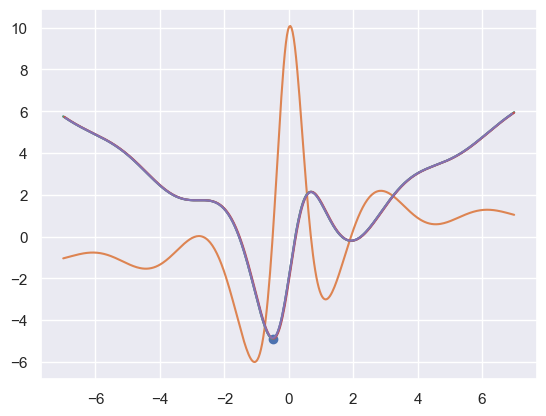

In [15]:
from scipy.misc import derivative
from scipy.optimize import fmin_bfgs

f = lambda x: (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

x = np.linspace(-7, 7, 400)
y = f(x)

plt.plot(x, y)
plt.plot(x, derivative(f, x, dx=1e-6))

min = fmin_bfgs(f, 0, disp=False)
plt.scatter(min, f(min))

plt.plot(x, moving_average(y, 1))
plt.plot(x[1:], moving_average(y, 2))
plt.plot(x[2:-2], moving_average(y, 5))

plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [16]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[4, 4, 3, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [17]:
import numpy.typing as npt

def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    assert x.size > 0

    cumsum = np.cumsum(x)
    val = np.random.rand(c) * np.sum(x)
    res = np.argmax(cumsum > val.reshape(c, 1), axis=1)

    return res

np_sample(np.array([50, 3, 1, 7, 20]), 5)

array([4, 0, 0, 0, 0], dtype=int64)

In [18]:
from scipy.stats import ttest_ind

a = sample([50, 3, 1, 7, 20], 5)
b = np_sample(np.array([50, 3, 1, 7, 20]), 5)

ttest_ind(a, b)

Ttest_indResult(statistic=1.5666989036012802, pvalue=0.1558194785392556)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [19]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1600

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

In [20]:
def np_walk(n: int):
    return np.random.randint(-3, 4, n).sum()

np_walk(10_000)

195

In [21]:
%timeit walk(10_000)
%timeit np_walk(10_000)

2.4 ms ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
40.6 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<AxesSubplot: ylabel='Density'>

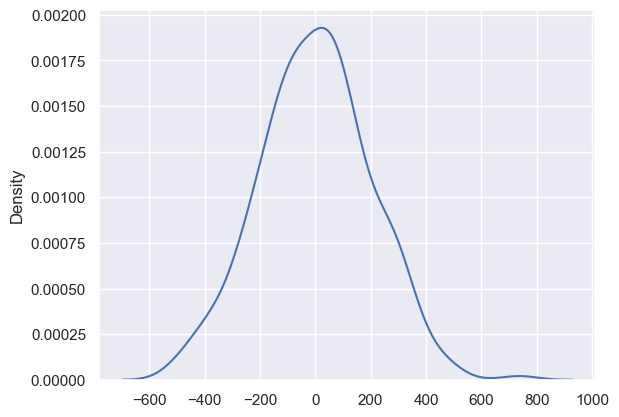

In [22]:
n = 300

res_np_walk = np.zeros(n)

for i in range(n):
    res_np_walk[i] = np_walk(10_000)

sns.kdeplot(data=res_np_walk)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [23]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


-0.29266451078689537

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

- Numba:

In [27]:
import numba

strange_conv_numba = numba.jit(strange_conv)
strange_conv_numba(a)

-0.29266451078689537

- Cython

In [33]:
import cython

%load_ext cython

In [35]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray["double", ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y + 1, x + 2] - a[y + 5, x + 3] * a[y, x] + 0.2 * a[y + 4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [51]:
strange_conv_cython(a)

-0.29266451078689537

- Taichi

- Pythran

- Сравнение производительности

In [38]:
%timeit strange_conv(a)

9.68 s ± 1.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%timeit strange_conv_numba(a)

25.3 ms ± 6.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
%timeit strange_conv_cython(a)

271 ms ± 4.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
